In [1]:
import random as rnd

In [2]:
p_s=200
n=4
m_r=0.8
epoch =200

In [3]:
def init_populaton(population_size,n):
    population_list = []
    for i in range( population_size):
        new_member = []
        for j in range(n):
            new_member.append(rnd.randint(1,n))
        new_member.append(0)    
        population_list.append(new_member)
    return population_list

In [4]:
def cross_over(population_list):
    for i in range(0,len(population_list),2):
        child1 =population_list[i][:len(population[0])//2] + population_list[i+1][len(population[0])//2:len(population[0])-1]+[0]
        child2 =population_list[i+1][:len(population[i+1])//2] + population_list[i][len(population[0])//2:len(population[0])-1]+[0]    
        population_list.append(child1)
        population_list.append(child2)
    return population_list

In [5]:
def mutation(population_list,mutation_rate,n):
    choosen_ones = [i for i in range(len(population_list)//2,len(population_list))]
    for i in range(len(population_list)//2):
        new_random=rnd.randint(0,(len(population_list)//2)-1)
        choosen_ones[new_random],choosen_ones[i]=choosen_ones[i],choosen_ones[new_random]
    choosen_ones = choosen_ones[:int(len(choosen_ones)*mutation_rate)]
    for i in choosen_ones:
        new_ch =rnd.randint(0,n-1)
        new_value = rnd.randint(1,n)
        population_list[i][new_ch]=new_value
    return population_list 

In [6]:
def fitness(population_list,n):
    i=0
    length =len(population_list)
    conflict =0
    while i<length:
        j=0
        conflict =0
        while j< n:
            l=j+1
            while l<n:
                if population_list[i][j]==population_list[i][l]:
                    conflict+=1
                if abs(j-l) == abs (population_list[i][j] - population_list[i][l]):
                    conflict+=1
                l+=1
            j+=1
        population_list[i][len(population_list[j])-1]=conflict
        i+=1        
    for i in range(len(population_list)):
        _min = 1
        for j in range(i,len(population_list)):
            if population_list[j][n]<population_list[_min][n]:
                _min=j
        population_list[i],population_list[_min] =population_list[_min],population_list[i]
    return population_list

In [11]:
from matplotlib import pyplot as plt
def showRes(res):
    l = len(res)
    plt.figure(figsize=(6, 6))
    plt.scatter([x+1 for x in range(l - 1)], res[:l - 1])
    for i in range(l):
        plt.plot([0.5, l - 0.5], [i + 0.5, i + 0.5], color = "k")
        plt.plot([i + 0.5, i + 0.5], [0.5, l - 0.5], color = "k")

# 0 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 1 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 2 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 3 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 4 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 5 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 6 ---> Best Solution so far: [2, 3, 1, 4, 1]
# 7 ---> Best Solution so far: [2, 3, 1, 4, 1]
Solution Found: [2, 4, 1, 3]


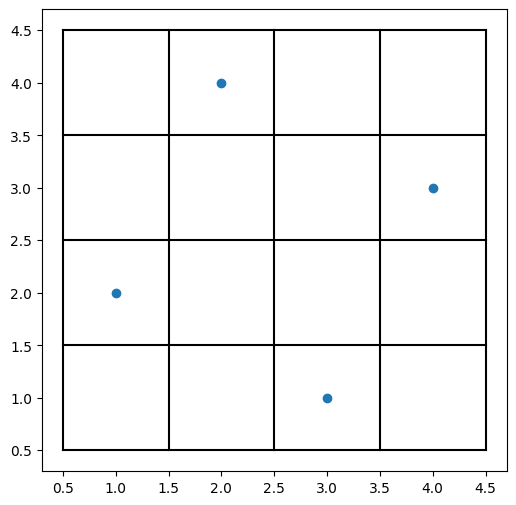

In [15]:
population = [[1,2,1,4,0],[2,1,4,2,0],[1,4,2,1,0],[3,1,1,2,0]]
for i in range (epoch):        
    population = cross_over(population)
    population = mutation(population,m_r,n)
    population = fitness(population,n)
    population = population[:len(population)//2]
    if population[0][n]==0:
        print("Solution Found:",population[0][0:n])
        showRes(population[0])
        break
    else:
        print("#",i,"---> Best Solution so far:",population[0]) 